# Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1

In [2]:
#Reading data
data=pd.read_excel("Orders.xlsx")
data.head()

,Order ID,Order Date,Order Quantity,Sales,Ship Mode,Profit,Unit Price,Customer Name,Customer Segment,Product Category
0,3,2010-10-13,6,261.5400,Regular Air,-213.250,38.94,Muhammed MacIntyre,Small Business,Office Supplies
1,6,2012-02-20,2,6.9300,Regular Air,-4.640,2.08,Ruben Dartt,Corporate,Office Supplies
2,32,2011-07-15,26,2808.0800,Regular Air,1054.820,107.53,Liz Pelletier,Corporate,Furniture
3,32,2011-07-15,24,1761.4000,Delivery Truck,-1748.560,70.89,Liz Pelletier,Corporate,Furniture
4,32,2011-07-15,23,160.2335,Regular Air,-85.129,7.99,Liz Pelletier,Corporate,Technology


# Problem 2.1

In [3]:
data.shape

(1007, 10)

**There are 1007 rows and 10 columns in the data.**

# Problem 2.2

In [4]:
data.isnull().any()

Order ID            False
Order Date          False
Order Quantity      False
Sales                True
Ship Mode           False
Profit               True
Unit Price          False
Customer Name       False
Customer Segment    False
Product Category    False
dtype: bool

**There are two variables that have missing values: *Sales* and *Profit*.**

# Problem 2.3

In [5]:
data.isnull().sum()

Order ID            0
Order Date          0
Order Quantity      0
Sales               8
Ship Mode           0
Profit              8
Unit Price          0
Customer Name       0
Customer Segment    0
Product Category    0
dtype: int64

**There are 8 missing values under "Sales" and another 8 missing values ander "Ship Mode".**

# Problem 2.4

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          1007 non-null   int64         
 1   Order Date        1007 non-null   datetime64[ns]
 2   Order Quantity    1007 non-null   int64         
 3   Sales             999 non-null    float64       
 4   Ship Mode         1007 non-null   object        
 5   Profit            999 non-null    float64       
 6   Unit Price        1007 non-null   float64       
 7   Customer Name     1007 non-null   object        
 8   Customer Segment  1007 non-null   object        
 9   Product Category  1007 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 78.8+ KB


**There are 5 numeric variables and 5 non-numeric(date included).**

# Problem 2.5

In [7]:
print("The order number of the last row of the dataset is %s." %data['Order ID'].iloc[-1])

The order number of the last row of the dataset is 7239.


### ! Since many of you thought that I'm asking for number of orders (Order Quantity), I considered those answers as correct. Below is the solution for that option also:

In [8]:
print("The number of orders for the last row of the dataset is %s." %data['Order Quantity'].iloc[-1])

The number of orders for the last row of the dataset is 50.


# Problem 3.1

In [9]:
print("Average order quantity is %s" %round(data['Order Quantity'].mean(),2))

Average order quantity is 24.83


# Problem 3.2

In [10]:
print("Median order quantity is %s" %data['Order Quantity'].median())

Median order quantity is 25.0


# Problem 3.3

In [11]:
print("75th percentile of the sales is %s" %round(data['Sales'].quantile(0.75),2))

75th percentile of the sales is 1695.52


# Problem 3.4

In [12]:
print("Minimum unit price is %s" %round(data['Unit Price'].min(),2))

Minimum unit price is 1.26


# Problem 4.1 

In [13]:
#Defining a function that will print number of observations of each category of object type variables
def value_counter(data_name,var_name): #first argument is the data name, the second one is the variable name
    return data_name[var_name].value_counts()

In [14]:
#let's look at example
value_counter(data,'Ship Mode')

Regular Air       768
Delivery Truck    132
Express Air       107
Name: Ship Mode, dtype: int64

# Problem 4.2

In [15]:
#printing the unique categories for the following variables: Ship Mode, Customer Segment, Product Category.
for i in ["Ship Mode","Customer Segment","Product Category"]:
    print(value_counter(data,i).index.tolist())

['Regular Air', 'Delivery Truck', 'Express Air']
['Corporate', 'Home Office', 'Consumer', 'Small Business']
['Office Supplies', 'Technology', 'Furniture']


# Problem 5.1

In [16]:
#dropping all the missing values
data.dropna(inplace=True)

In [17]:
data.isna().any().sum()

0

Now there are 0 missing values.

# Problem 5.2

In [18]:
#dropping Order ID column
data.drop('Order ID',inplace=True, axis=1)
data.head(3)

,Order Date,Order Quantity,Sales,Ship Mode,Profit,Unit Price,Customer Name,Customer Segment,Product Category
0,2010-10-13,6,261.54,Regular Air,-213.25,38.94,Muhammed MacIntyre,Small Business,Office Supplies
1,2012-02-20,2,6.93,Regular Air,-4.64,2.08,Ruben Dartt,Corporate,Office Supplies
2,2011-07-15,26,2808.08,Regular Air,1054.82,107.53,Liz Pelletier,Corporate,Furniture


# Problem 5.3

In [19]:
print("New shape of data is ", data.shape)

New shape of data is  (999, 9)


# Problem 5.4

In [20]:
#removing spaces in variable names
data.columns=data.columns.str.replace(" ","_")
print("New names of the columns are: %s" %data.columns.tolist())

New names of the columns are: ['Order_Date', 'Order_Quantity', 'Sales', 'Ship_Mode', 'Profit', 'Unit_Price', 'Customer_Name', 'Customer_Segment', 'Product_Category']


# Problem 5.5

In [21]:
data_num=data.select_dtypes(["number"])
data_obj=data.select_dtypes(["object"])

In [22]:
print(data_num.info())
print('\n')
print('--------------------------------------')
print(data_obj.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 1006
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Quantity  999 non-null    int64  
 1   Sales           999 non-null    float64
 2   Profit          999 non-null    float64
 3   Unit_Price      999 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 39.0 KB
None


--------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 1006
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Ship_Mode         999 non-null    object
 1   Customer_Name     999 non-null    object
 2   Customer_Segment  999 non-null    object
 3   Product_Category  999 non-null    object
dtypes: object(4)
memory usage: 39.0+ KB
None


# Problem 6.1

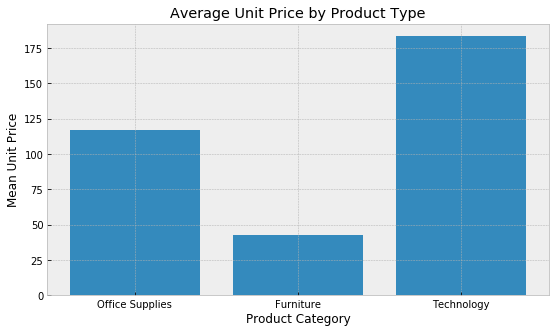

In [23]:
plt.figure(figsize=(9,5)) #setting chart size
plt.style.use('bmh') #setting style

plt.bar(data.Product_Category.unique(),
        data.groupby(["Product_Category"])["Unit_Price"].mean()) #creating chart

plt.title("Average Unit Price by Product Type") #giving heading
plt.xlabel("Product Category") #Name of X-axis
plt.ylabel("Mean Unit Price") #Name of Y-axis

plt.show()

# Problem 6.2

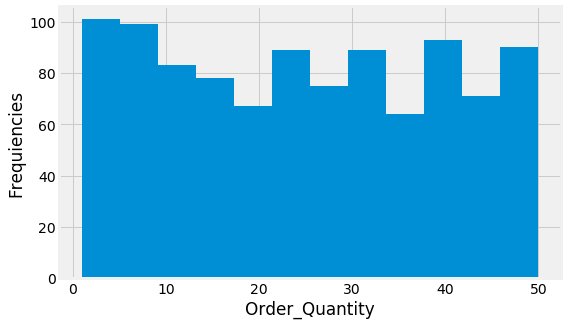

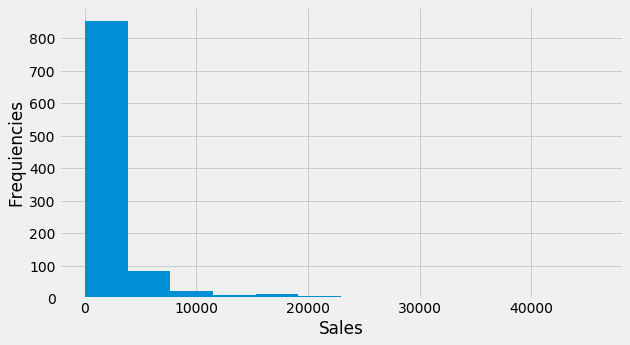

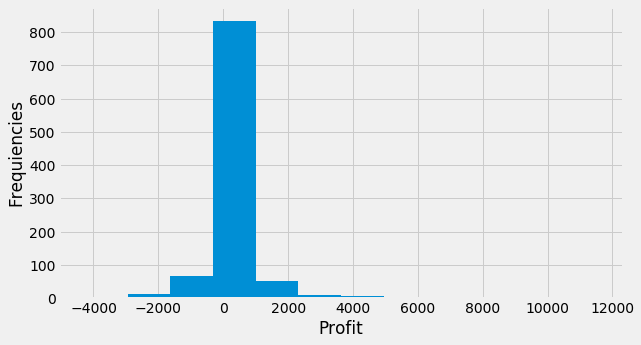

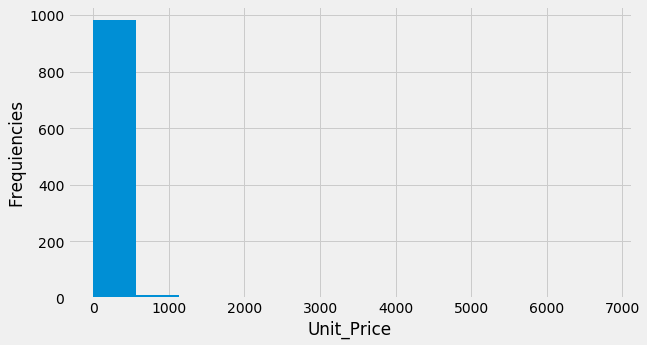

In [24]:
for i in data_num.columns:
    plt.figure(figsize=(9,5))
    plt.style.use('fivethirtyeight') 
    plt.hist(data_num[i],
             bins=12)
    plt.xlabel(i)
    plt.ylabel("Frequiencies")
    plt.show()